In [1]:
#This is an illustrative exploratory data analysis using the Wisconsin breast cancer dataset
# I have used 6 of the 30 features as well as the outcome
#malignant missed cancerous tumor, benign means otherwise
#future update will use the complete set of features
#future update will also involve making predictions using LightGBM and KNN
#Load Python Libraries
#Data manipulation and linear algebra
import pandas as pd
import numpy as np
#Plots
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
import plotly.tools as tls
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)
import squarify


In [2]:
#Load the dataset
data=pd.read_csv("cancer.csv")

In [3]:
#display the first five observations and information about the data
display(data.head(),data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


None

In [4]:
#Exctract a dataset comprising columns:diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,
#compactness_mean, and concavity_mean for the purpose of this illustrative EDA
dataset=data.iloc[:,1:8]


In [5]:
#Change diagnoses M(malignant), and B(benign) to 1 and 0, respectively
dataset['diagnosis'].replace('M', 1,inplace=True) 
dataset['diagnosis'].replace('B', 0,inplace=True)
dataset.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280


In [6]:

#Separate the new dataset into two sets, one with benign (0) , and another with malignant (1) diagnoses
B = dataset[(dataset['diagnosis'] ==0)]
M = dataset[(dataset['diagnosis'] == 1 )]

#Count the number of diagnoses in each category
#Assign value
def target_count():
    trace = go.Bar( x = dataset['diagnosis'].value_counts().values.tolist(), 
                    y = ['Benign','Malignant' ], 
                    orientation = 'h', 
                    text=dataset['diagnosis'].value_counts().values.tolist(), 
                    textfont=dict(size=15),
                    textposition = 'auto',
                    opacity = 0.8,marker=dict(
                    color=['lightskyblue', 'yellowgreen'],
                    line=dict(color='#000000',width=1.5)))

    layout = dict(title =  'Count of Diagnoses')

    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)

#Diagnoses by percentages
def target_percent():
    trace = go.Pie(labels = ['Benign','Malignant'], values = dataset['diagnosis'].value_counts(), 
                   textfont=dict(size=15), opacity = 0.8,
                   marker=dict(colors=['gold', 'yellowgreen'], 
                               line=dict(color='#000000', width=1.5)))


    layout = dict(title =  'Distribution of Diagnoses')

    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)

In [7]:
#plot the counts and distributions
target_count()
target_percent()

In [8]:
#Check for missing values
dataset.isnull().sum()

diagnosis           0
radius_mean         0
texture_mean        0
perimeter_mean      0
area_mean           0
smoothness_mean     0
compactness_mean    0
dtype: int64

In [9]:
#no missing values

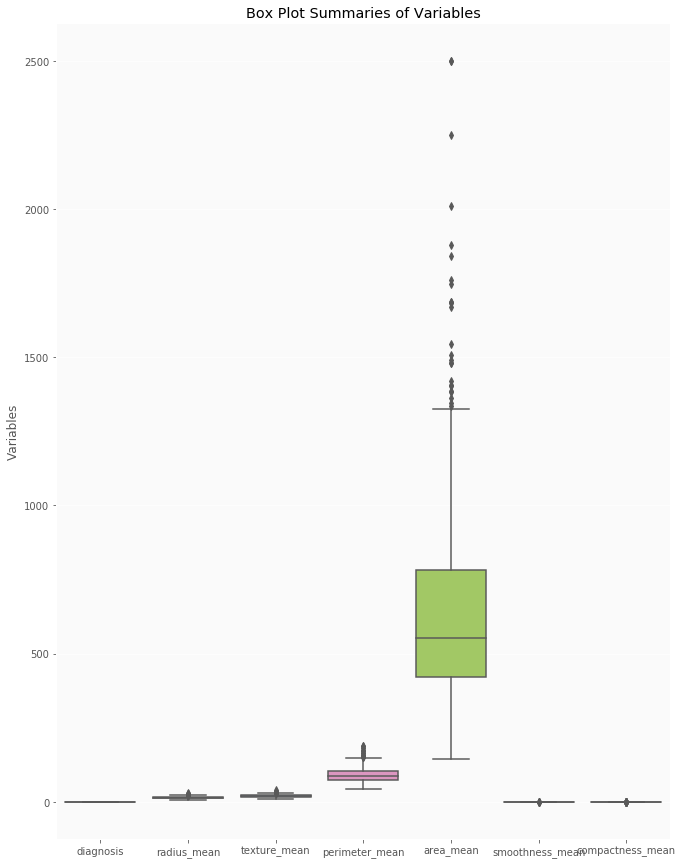

In [10]:
#visualize the variables using boxplots (ggplot2 styles)
plt.style.use('ggplot') 
f, ax = plt.subplots(figsize=(11, 15))
ax.set_facecolor('#fafafa')
ax.set(xlim=(-.05, 200))
plt.ylabel('Variables')
plt.title("Box Plot Summaries of Variables")
ax = sns.boxplot(data = dataset, 
  orient = 'v', 
  palette = 'Set2')

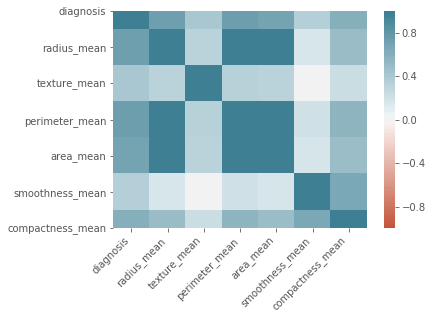

In [11]:
#Correlation heatmap
matrix=dataset.corr()
ax = sns.heatmap(
    matrix, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [12]:
def plot_distribution(data_select, size_bin) :  
    # 2 datasets
    tmp1 = M[data_select]
    tmp2 = B[data_select]
    hist_data = [tmp1, tmp2]
    
    group_labels = ['Malignant', 'Benign']
    colors = ['#FFD700', '#7EC0EE']

    fig = ff.create_distplot(hist_data, group_labels, colors = colors, show_hist = True, bin_size = size_bin, curve_type='kde')
    
    fig['layout'].update(title = data_select)

    py.iplot(fig, filename = 'Density plot')

In [13]:
#radius_mean
plot_distribution('radius_mean', 0)

In [14]:
#median
#define a generic function for the median value of any variable:
def median_value(var):   
    temp = dataset[dataset[var].notnull()]
    temp = temp[[var, 'diagnosis']].groupby(['diagnosis'])[[var]].median().reset_index()
    return temp

In [15]:
#confirm median radius_mean value for benign and malignant diagnoses
median_value('radius_mean')


,diagnosis,radius_mean
0,0,12.200
1,1,17.325


In [16]:
#texture_mean
plot_distribution('texture_mean',0)

In [17]:
median_value('texture_mean')

,diagnosis,texture_mean
0,0,17.39
1,1,21.46


In [18]:
#perimeter_mean
plot_distribution('perimeter_mean',0)

In [19]:
median_value('perimeter_mean')

,diagnosis,perimeter_mean
0,0,78.18
1,1,114.20


In [20]:
plot_distribution('area_mean',0)

In [21]:
plot_distribution('smoothness_mean',0)

In [22]:
median_value('smoothness_mean')

,diagnosis,smoothness_mean
0,0,0.09076
1,1,0.10220


In [23]:
plot_distribution('compactness_mean',0)

In [24]:
median_value('compactness_mean')

,diagnosis,compactness_mean
0,0,0.07529
1,1,0.13235


In [25]:
dataset.describe()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400


In [26]:
#observations: needs feature scaling
# machine learning predictions to be included in the next update
#credits:
#https://www.kaggle.com/vincentlugat/pima-indians-diabetes-eda-prediction-0-906
#https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

